In [11]:
import pandas as pd
import numpy as np
import scipy as sc

In [12]:
data = pd.read_csv("D:\Python27\AI Final Assignments\mnist_train.csv")

In [13]:
A = data.label

In [14]:
A.shape

(42000L,)

In [15]:
data.drop(['label'], axis=1, inplace=True)

In [16]:
B = data

In [17]:
print A.shape
print B.shape

(42000L,)
(42000, 784)


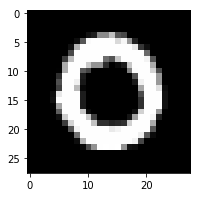

In [18]:
from matplotlib import pyplot as plt

plt.figure(figsize=(3,3))

grid = B.iloc[1].values.reshape((28,28))

plt.imshow(grid, cmap='gray')
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler

standardize_data = StandardScaler().fit_transform(B)
print standardize_data.shape

(42000L, 784L)


In [20]:
#find the co-variance matrix which is : A^T * A
sample_data = standardize_data


# PCA

In [21]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


('shape of pca_reduced.shape = ', (42000L, 2L))


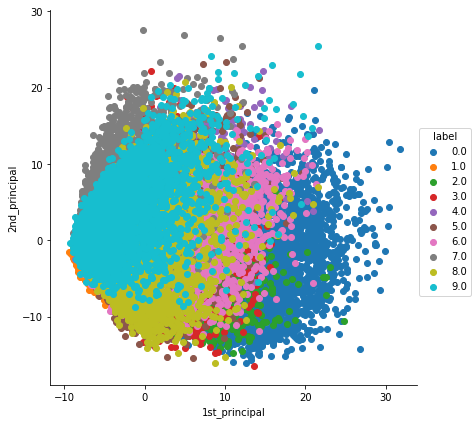

In [22]:
import seaborn as sn
pca_data = np.vstack((pca_data.T, A)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [23]:
print pca_data.shape
print A.shape

(42000L, 3L)
(42000L,)


# T-SNE

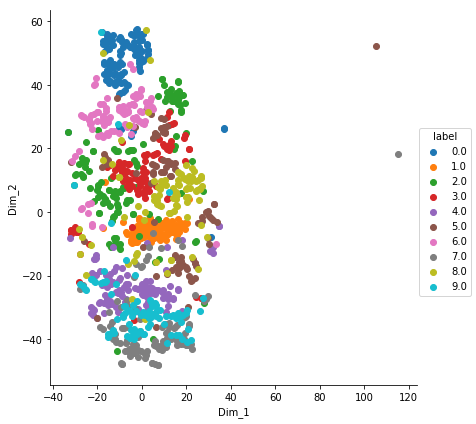

In [24]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 42000 points as TSNE takes a lot of time for 15K points
data_1000 = standardize_data[0:1000, :]
labels_1000 = A[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [28]:
from sklearn.model_selection import *

print A.shape
print B.shape

(42000L,)
(42000, 784)


In [30]:
Y = A
X = B

In [35]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3)

In [39]:
print "shape of X_Train{}:".format(X_Train.shape)
print "shape of Y_Train{}:".format(Y_Train.shape)
print "shape of X_Test{}:".format(X_Test.shape)
print "shape of Y_Test{}:".format(Y_Test.shape)

shape of X_Train(29400, 784):
shape of Y_Train(29400L,):
shape of X_Test(12600, 784):
shape of Y_Test(12600L,):


In [40]:
X_tr, X_cv, y_tr, y_cv = train_test_split(X_Train, Y_Train, test_size = 0.3)

In [44]:
# from sklearn.neighbors import KNeighborsClassifier
# for k in [1,3,5,7,25]:
#     model = KNeighborsClassifier(n_neighbors = k, weights='distance', p=2)
#     model.fit(X_tr, y_tr)
#     score = model.score(X_cv, y_cv)
#     print k, score

1 0.6767573696145125
3 0.745578231292517
5 0.7665532879818594
7 0.7649659863945578
25 0.7636054421768708


In [46]:
cv_scores = []
neighbors = range(0,17,2)

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='distance', p=2, metric='euclidean')
    kfold = KFold(n_splits=10, random_state=0)
    scores = cross_val_score(knn, Train_X, Train_Y, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))


k=1 94.29 (+/- 0.91)
k=3 94.40 (+/- 0.75)
k=5 94.31 (+/- 0.94)
k=7 94.21 (+/- 0.80)
k=9 93.90 (+/- 1.05)
k=11 93.79 (+/- 0.87)
k=13 93.50 (+/- 0.86)
k=15 93.29 (+/- 0.96)
k=17 93.03 (+/- 0.86)


The optimal number of neighbors is 2 with 94.3%


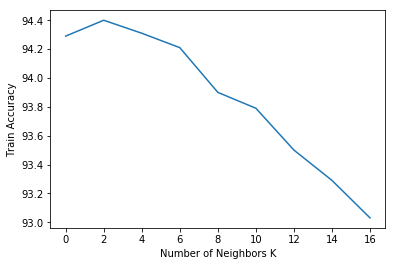

In [47]:
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))
 
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(Train_X, Train_Y)
predictions = model.predict(Test_X)

print classification_report(Test_Y, predictions)

             precision    recall  f1-score   support

          0       0.94      1.00      0.97       175
          1       0.90      1.00      0.95       234
          2       0.98      0.89      0.93       219
          3       0.91      0.91      0.91       207
          4       0.94      0.94      0.94       217
          5       0.91      0.91      0.91       179
          6       0.95      0.97      0.96       178
          7       0.89      0.91      0.90       205
          8       0.95      0.80      0.87       192
          9       0.89      0.90      0.89       194

avg / total       0.92      0.92      0.92      2000



I think that digit is: 4


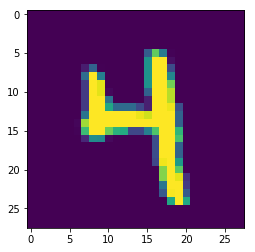

I think that digit is: 7


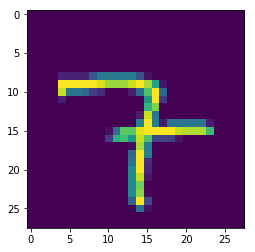

I think that digit is: 6


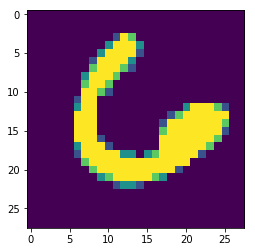

I think that digit is: 3


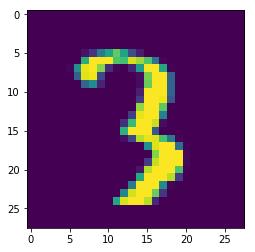

I think that digit is: 1


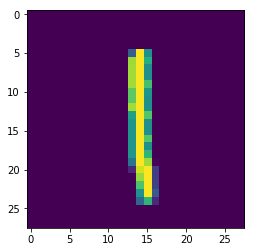

In [49]:
for i in np.random.randint(0, high=len(Test_Y), size=(5,)):
    image = Test_X[i]
    prediction = model.predict(image.reshape(1, -1))[0]
    image = image.reshape((28, 28))
    print("I think that digit is: {}".format(prediction))
    plt.imshow(image)
    plt.show()
#     cv2.waitKey(0) # press enter to go to next!